# Getting Started:

Run the cell below before doing anything else to make sure you have the required packages installed. 

If you are familiar with Gradient Notebooks and Jupyter, skip to the section "Face Recognition"

In [ ]:
!pip install matplotlib
!pip install numpy
!pip install dlib
!pip install scipy
!pip install imageio

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


     |█▉                              | 430 kB 14.1 MB/s eta 0:00:01

     |███████▏                        | 1.6 MB 14.1 MB/s eta 0:00:01

     |████████████▌                   | 2.9 MB 14.1 MB/s eta 0:00:01

     |█████████████████▉              | 4.1 MB 14.1 MB/s eta 0:00:01

     |███████████████████████         | 5.3 MB 14.1 MB/s eta 0:00:01

     |████████████████████████████▍   | 6.5 MB 14.1 MB/s eta 0:00:01

     |████████████████████████████████| 7.4 MB 14.1 MB/s 


 \

 |

 /

 -

 \

 |

 /

 -

 \

 |

 /

 -

 \

 |

 /

 -

 \

 |

 /

 -

 \

 |

 /

 -

 \

 |

 /

 -

 \

 |

 /

 -

 \

 |

 /

 -

 \

 |

 /

 -

 \

 |

 /

 -

 \

 |

 /

 -

 \

 |

 /

 -

 \

 |

 /

 -

 \

 |

 /

 -

 \

 |

 /

 -

 \

 |

 /

 -

 \

 |

 /

 -

 \

 |

 /

 -

 done


  Created wheel for dlib: filename=dlib-19.23.1-cp38-cp38-linux_x86_64.whl size=4112643 sha256=2937e5d0d00c76b1158762ee8d718c3a6af969e66cf959fbb5c6682954618c05
  Stored in directory: /tmp/pip-ephem-wheel-cache-bqxhoth5/wheels/3a/ac/73/b4a0ecae4672035801b9d8a9e83eb31049bd438e7ad6ce4852
Successfully built dlib


# Introduction to the JupyterLab and Jupyter Notebooks

This is a short introduction to two of the flagship tools created by [the Jupyter Community](https://jupyter.org).

> **Note**: This interface is provided by the [JupyterLite project](https://jupyterlite.readthedocs.io/en/latest/), which embeds an entire JupyterLab interface, with many popular packages for scientific computing, in your browser. There may be some minor differences in behavior between JupyterLite and the JupyterLab you install locally.

## JupyterLab 🧪

**JupyterLab** is a next-generation web-based user interface for Project Jupyter. It enables you to work with documents and activities such as Jupyter notebooks, text editors, terminals, and custom components in a flexible, integrated, and extensible manner. It is the interface that you're looking at right now.

**For an overview of the JupyterLab interface**, see the **JupyterLab Welcome Tour** on this page, by going to `Help -> Welcome Tour` and following the prompts.

> **See Also**: For a more in-depth tour of JupyterLab with a full environment that runs in the cloud, see [the JupyterLab introduction on Binder](https://mybinder.org/v2/gh/jupyterlab/jupyterlab-demo/HEAD?urlpath=lab/tree/demo).

## Jupyter Notebooks 📓

**Jupyter Notebooks** are a community standard for communicating and performing interactive computing. They are a document that blends computations, outputs, explanatory text, mathematics, images, and rich media representations of objects.

JupyterLab is one interface used to create and interact with Jupyter Notebooks.

**For an overview of Jupyter Notebooks**, see the **JupyterLab Welcome Tour** on this page, by going to `Help -> Notebook Tour` and following the prompts.

> **See Also**: For a more in-depth tour of Jupyter Notebooks and the Classic Jupyter Notebook interface, see [the Jupyter Notebook IPython tutorial on Binder](https://mybinder.org/v2/gh/ipython/ipython-in-depth/HEAD?urlpath=tree/binder/Index.ipynb).

## An example: visualizing data in the notebook ✨

Below is an example of a code cell. We'll visualize some simple data using two popular packages in Python. We'll use [NumPy](https://numpy.org/) to create some random data, and [Matplotlib](https://matplotlib.org) to visualize it.

Note how the code and the results of running the code are bundled together.

## The Gradient Notebooks IDE 

Much like Jupyter Notebooks or JupyterLab, you can execute Python code in cells using the Gradient IDE. You also have access to a terminal, file manager, and dataset mounting on the left. 

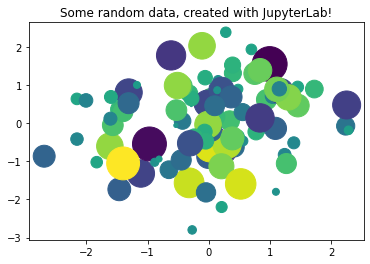

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

# Generate 100 random data points along 3 dimensions
x, y, scale = np.random.randn(3, 100)
fig, ax = plt.subplots()

# Map each onto a scatterplot we'll create with Matplotlib
ax.scatter(x=x, y=y, c=scale, s=np.abs(scale)*500)
ax.set(title="Some random data, created with JupyterLab!")
plt.show()

# Face Recognition

In [ ]:
!wget http://dlib.net/files/dlib_face_recognition_resnet_model_v1.dat.bz2 
!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
!bzip2 -d dlib_face_recognition_resnet_model_v1.dat.bz2
!bzip2 -d shape_predictor_68_face_landmarks.dat.bz2 

In [ ]:
#Step1:Configure and Start
import imageio
import dlib
import numpy as np
import os
# Get Face Detector from dlib
# This allows us to detect faces in image
face_detector = dlib.get_frontal_face_detector()
# Get Pose Predictor from dlib
# This allows us to detect landmark points in faces and understand the pose/angle of the face
shape_predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')
# Get the face recognition model
# This is what gives us the face encodings (numbers that identify the face of a particular person)
face_recognition_model = dlib.face_recognition_model_v1('dlib_face_recognition_resnet_model_v1.dat')
# This is the tolerance for face comparisons
# The lower the number - the stricter the comparison
# Use a smaller value to avoid hits
# To avoid false negatives (i.e. faces of the same person doesn't match), use higher value
# 0.5-0.6 works well
TOLERANCE = 0.6

#Step2:Obtain facial encodings from a JPEG
# Using the neural network, this code takes an image and returns its ace encodings
def get_face_encodings(path_to_image):
   # Load image using imaegeio
   image = imageio.imread(path_to_image)
   # Face detection is done with the use of a face detector
   detected_faces = face_detector(image, 1)
   # Get the faces' poses/landmarks
   # The code that calculates face encodings will take this as an argument   # This enables the neural network to provide similar statistics for almost the same people's faces independent of camera angle or face placement in the picture
   shapes_faces = [shape_predictor(image, face) for face in detected_faces]
   # Compile the face encodings for each face found and return
   return [np.array(face_recognition_model.compute_face_descriptor(image, face_pose, 1)) for face_pose in shapes_faces]

#Step3:Face to Face Comparisons
# This function takes a list of known faces
def compare_face_encodings(known_faces, face):
   # Finds the difference between each known face and the given face (that we are comparing)
   # Calculate norm for the differences with each known face
   # Return an array with True/Face values based on whether or not a known face matched with the given face
   # A match occurs when the (norm) difference between a known face and the given face is less than or equal to the TOLERANCE value
   return (np.linalg.norm(known_faces - face, axis=1) <= TOLERANCE)

#Step4:FInding a match
# This function returns the name of the person whose image matches with the given face (or 'Not Found')
# known_faces is a list of face encodings
# names is a list of the names of people (in the same order as the face encodings - to match the name with an encoding)
# face is the face we are looking for
def find_match(known_faces, names, face):
   # Call compare_face_encodings to get a list of True/False values indicating whether or not there's a match
   matches = compare_face_encodings(known_faces, face)
   # Return the name of the first match
   count = 0
   for match in matches:
       if match:
           return names[count]
       count += 1
   # Return not found if no match found
   return 'Not Found'

#Step5:Obtaining face encodings for all the photos
# Get path to all the known images
# Filtering on .jpg extension - so this will only work with JPEG images ending with .jpg
image_filenames = filter(lambda x: x.endswith('.jpeg'), os.listdir('images/'))
# Sort in alphabetical order
image_filenames = sorted(image_filenames)
# Get full paths to images
paths_to_images = ['images/' + x for x in image_filenames]
# List of face encodings we have
face_encodings = []
# Loop over images to get the encoding one by one
for path_to_image in paths_to_images:
   # Get face encodings from the image
   face_encodings_in_image = get_face_encodings(path_to_image)
   # Make sure there's exactly one face in the image
   if len(face_encodings_in_image) != 1:
       print("Please change image: " + path_to_image + " - it has " + str(len(face_encodings_in_image)) + " faces; it can only have one")
       exit()
   # Append the face encoding found in that image to the list of face encodings we have
   face_encodings.append(get_face_encodings(path_to_image)[0])

#Step6:Identifying the recognized faces in every image in the test subfolder
# Get path to all the test images
# Filtering on .jpg extension - so this will only work with JPEG images ending with .jpg
test_filenames = filter(lambda x: x.endswith('.jpeg'), os.listdir('test/'))
# Get full paths to test images
paths_to_test_images = ['test/' + x for x in test_filenames]
# Get list of names of people by eliminating the .JPG extension from image filenames
names = [x[:-4] for x in image_filenames]
# Iterate over test images to find match one by one
for path_to_image in paths_to_test_images:
   # Get face encodings from the test image
   face_encodings_in_image = get_face_encodings(path_to_image)
   # Make sure there's exactly one face in the image
   if len(face_encodings_in_image) != 1:
       print("Please change image: " + path_to_image + " - it has " + str(len(face_encodings_in_image)) + " faces; it can only have one")
       exit()
   # Find match for the face encoding found in this test image
   match = find_match(face_encodings, names, face_encodings_in_image[0])
   # Print the path of test image and the corresponding match
   print(path_to_image, match)





test/diff3.jpeg Not Found


test/james.jpeg james.


test/diff2.jpeg Not Found


In [ ]:
!python face.py

test/diff3.jpeg Not Found


test/james.jpeg james.


test/diff2.jpeg Not Found
